# 고양이 수염 스티커 만들기
## Step 1. 스티커 구하기 or 만들기

https://www.flaticon.com/free-icon/cat-whiskers_24674?term=cat%20nose&page=1&position=1
고양이 사진 다운로드
### - 필요한 모듈

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import dlib
import math
import cv2
import os

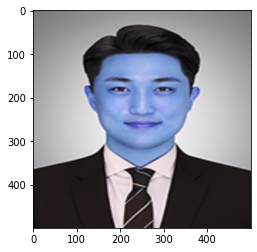

In [15]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/장봉준.jpg'
img_bgr = cv2.imread(my_image_path) #- OpenCV로 이미지를 불러오기
img_bgr = cv2.resize(img_bgr, (500, 500))
img_show = img_bgr.copy()      #- 출력용 이미지 따로 보관합니다.
plt.imshow(img_bgr)
plt.show()

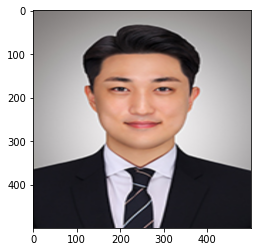

In [16]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # opencv는 BGR를 사용하기에 plt.show이전에 RGB 이미지로 바꾸기
plt.imshow(img_rgb)
plt.show()

## Step 2. 얼굴 검출 & 랜드마크 검출 하기


In [17]:
#- detector 선언
detector_hog = dlib.get_frontal_face_detector() 
print("🌫🛸")

🌫🛸


In [18]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # detector_hog(image, 이미지 피라미드 수)
print("🌫🛸")

🌫🛸


rectangles[[(142, 118) (365, 341)]]


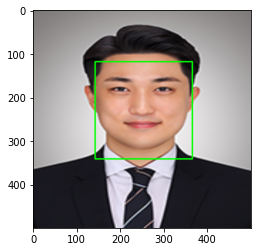

In [19]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [20]:
#랜드마크 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [21]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


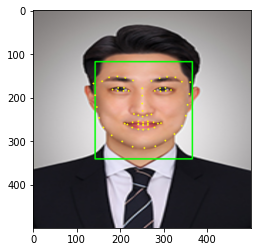

In [22]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) #68개의 이목구비 위치를 노란색으로 표시

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## Step 3. 스티커 적용 위치 확인하기

In [23]:
#좌표확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))
    
#(x,y) : 코의 중심점
#(w,h) : 스티커의 크기

(251, 231)
(x,y) : (251,119)
(w,h) : (224,224)


(224, 224, 3)


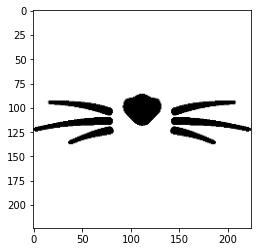

In [24]:
#스티커 불러오기 리사이즈
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)
print (img_sticker.shape)

In [25]:
refined_x = x - w // 2  # left
refined_y = y       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (139,119)


## Step 4. 스티커 적용하기

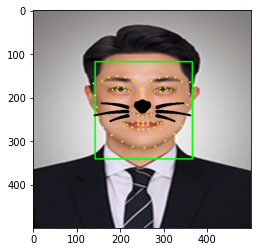

In [26]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

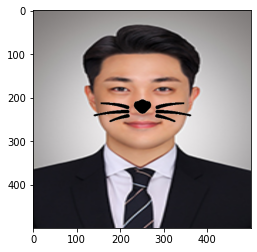

In [27]:
# bounding box와 landmark를 제거하기 위해 원본을 불러와서 최종 결과만 출력

sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 사이즈를 500,500으로 리사이즈 안해주면 흰색배경 테두리가 남는다 이유가 뭘까?


## Step 5. 문제점 찾아보기

### 1) 각도가 다른 사진해보기 

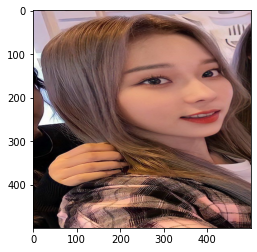

In [28]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/winter.jpg'
img_bgr = cv2.imread(my_image_path) #- OpenCV로 이미지를 불러오기
img_bgr = cv2.resize(img_bgr, (500, 500))
img_show = img_bgr.copy()      #- 출력용 이미지 따로 보관합니다.

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # opencv는 BGR를 사용하기에 plt.show이전에 RGB 이미지로 바꾸기
plt.imshow(img_rgb)
plt.show()

rectangles[[(142, 118) (365, 341)]]


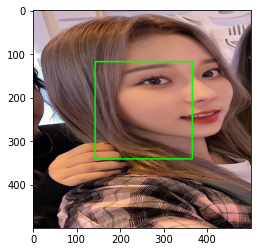

In [29]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

rectangles[]


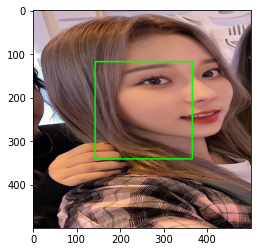

In [30]:
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)

print(dlib_rects)   

for dlib_rect in dlib_rects: 
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# 정사각형이 그려진 파일 저장

plt.imshow(img_show_rgb)
plt.show()

### ? 윈터 얼굴을 인식하지 못한다..

다른 사진을 가져와 봐야겠다.
아마도 사진의 해상도가 낮아 흐릿해서 그런것 같다.

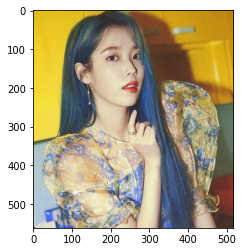

In [31]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/IU.jpg'
img_bgr = cv2.imread(my_image_path) #- OpenCV로 이미지를 불러오기
img_show = img_bgr.copy()      #- 출력용 이미지 따로 보관합니다.

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # opencv는 BGR를 사용하기에 plt.show이전에 RGB 이미지로 바꾸기
plt.imshow(img_rgb)
plt.show()

rectangles[[(167, 81) (322, 236)]]
68


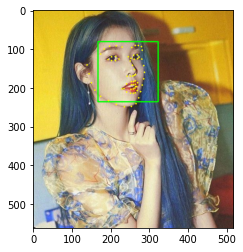

In [32]:
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
dlib_rects = detector_hog(img_rgb, 1)   # detector_hog(image, 이미지 피라미드 수)
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))


for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

(261, 153)
(x,y) : (261,75)
(w,h) : (156,156)
(156, 156, 3)
(x,y) : (183,75)


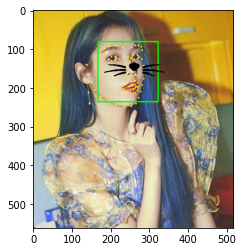

In [33]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.width()//2
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
plt.imshow(img_sticker)
print (img_sticker.shape)

# 스티커 불러오기/리사이즈

refined_x = x - w // 2  # left
refined_y = y       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### 각도가 기울어 있어서 코의 위치에 정확하게 들어가지 않고 수염이 부자연스럽다.
### 해결방법에는 무엇이 있을까?
### 고양이 수염을 회전시켜주면 될 것 같다. 어떻게 해야하지?

### 우수후기를 참고했다. 랜드마크의 각도를 구해서 수염스티커에 적용하면 된다 ! 

### - 해결방법

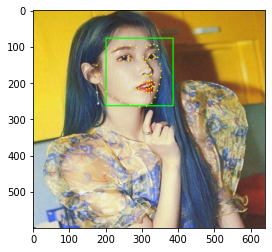

In [34]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/IU.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽기
img_bgr = cv2.resize(img_bgr, (640, 600))  # 640x600의 크기로 Resize #왜 Resize해주는거지?
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # opencv는 BGR를 사용하기에 RGB 이미지로 바꾸기


detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
dlib_rects = detector_hog(img_rgb, 1)   # detector_hog(image, 이미지 피라미드 수)

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [35]:
x = []
y = []
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x.append(landmark[30][0])    # x = landmark[30][0]
    y.append(landmark[30][1] - dlib_rect.width()//2)  # y =land~~
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(w,h) : (%d,%d)'%(w,h))

(w,h) : (186,186)


In [36]:
# 회전 각 구하기

tan_theta = (landmark[30][0]-landmark[27][0])/(landmark[30][1]-landmark[27][1])
theta = np.arctan(tan_theta)
rotate_angle = theta *180/math.pi
print(rotate_angle)

29.197486046064476


(156, 156, 3)


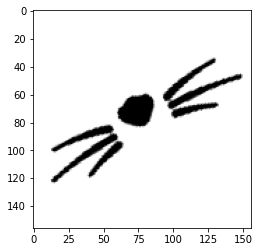

In [37]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR,borderValue=(255,255,255))
  return result

img_rotate = rotate_image(img_sticker,rotate_angle)
print(img_rotate.shape)
plt.imshow(img_rotate)
plt.show()

In [38]:
refined_x = []
refined_y = []
for i in range(len(x)):
    refined_x.append(x[i] - w//2)  # left
    refined_y.append(y[i])     # top

In [41]:
for i in range(len(x)):
    sticker_area = img_bgr[refined_y[i]:refined_y[i]+img_rotate.shape[0], refined_x[i]:refined_x[i]+img_rotate.shape[1]]
    img_show[refined_y[i]:refined_y[i]+img_rotate.shape[0], refined_x[i]:refined_x[i]+img_rotate.shape[1]] = np.where(img_rotate==255,sticker_area,img_rotate)

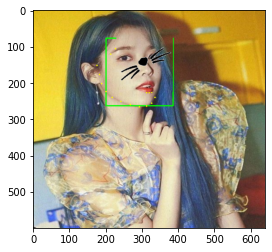

In [42]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

우수노도 보고 했는데 너무 많이 회전했따.. 왜이렇게 되는지 모르겠다..

## step6 후기

- 얼굴의 해상도가 흐릿하거나 밝거나하면 얼굴의 인식이 불명확하게 되는 것 같다. 또한 코의 각도를 수정해줬는데 아직 어떤 원리대로 코의 각도가 수정되는지에 대해서 많이 미흡하다고 생각한다. 추후에 공부해서 다시 기록하겠다.